### 09_AE_fashion
![efc]"(jupyter_logo_s.png)  
![abc]"(http://jupyter.org/assets/main-logo.svg)
![](jupyter_logo_s.png) 
![](http://jupyter.org/assets/main-logo.svg)


In [1]:
import os,sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models,optimizers,Sequential,metrics,losses,utils
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence

print(sys.version)
print(tf.test.is_gpu_available())
print(tf.__version__)

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
False
2.0.0


In [31]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
class_names = ["上衣","褲子","套衫","連衣裙","外套","涼鞋","襯衫","運動鞋","袋子","踝靴"]

def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:train_nums], y_test[:train_nums]
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.
    
    
    x_train = tf.reshape(x_train, shape=(-1,28*28))
    x_test = tf.reshape(x_test, shape=(-1,28*28))
    #y_train = utils.to_categorical(y_train)#.astype(np.int32)
    #y_test = utils.to_categorical(y_test)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test),scale=10)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(6000, 784) (6000,)
(6000, 784) (6000,)


In [6]:
dim_reduce = 10

class AE(models.Model):
    def __init__(self):
        super(AE,self).__init__()
        #encoder
        self.model_encoder = Sequential([layers.Dense(256,activation="relu"),
                                 layers.Dense(128,activation="relu"),
                                 layers.Dense(dim_reduce,activation="relu")
                                ])

        #decoder
        self.model_decoder = Sequential([layers.Dense(128,activation="relu"),
                                 layers.Dense(256,activation="relu"),
                                 layers.Dense(784,activation="relu")
                                ])

    def call(self, inputs):
        x = self.model_encoder(inputs)
        x = self.model_decoder(x)
        return x
    
model = AE()
model.build(input_shape=(None,784))
model.summary()

Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      multiple                  235146    
_________________________________________________________________
sequential_1 (Sequential)    multiple                  235920    
Total params: 471,066
Trainable params: 471,066
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size=128
epochs=6
optimizer = optimizers.Adam(lr=1e-3)
model.compile(loss="binary_crossentropy",optimizer=optimizer)
history = model.fit(x_train,x_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,x_test))

Train on 6000 samples, validate on 6000 samples
Epoch 1/6
6000/6000 [==============================] - 1s 93us/sample - loss: 0.4724 - val_loss: 0.4817
Epoch 2/6
6000/6000 [==============================] - 1s 122us/sample - loss: 0.4786 - val_loss: 0.4805
Epoch 3/6
6000/6000 [==============================] - 1s 105us/sample - loss: 0.4720 - val_loss: 0.4782
Epoch 4/6
6000/6000 [==============================] - 1s 102us/sample - loss: 0.4775 - val_loss: 0.4812
Epoch 5/6
6000/6000 [==============================] - 1s 98us/sample - loss: 0.4720 - val_loss: 0.4739
Epoch 6/6
6000/6000 [==============================] - 1s 96us/sample - loss: 0.4677 - val_loss: 0.4723


In [ ]:
# for i in range(10):
#   for step,x in enumerate(data):
#     x = tf.reshape(x,[-1,784])
#     with tf.GradientTape() as tape:
#       logits = model(x)
#       loss = tf.losses.binary_crossentropy(x,logits,from_logits=True)
#       loss = tf.reduce_mean(loss)
#     grads = tape.gradient(loss,model.trainable_variables)
#     optimizer.apply_gradients(zip(grads,model.trainable_variables))
    
#     if step %100==0:
#       print(i,step,'loss:',float(loss))
      
#   x = next(iter(data_test))
#   val_x = tf.reshape(x,[-1,784])
#   logits = model(val_x)
#   x_hat = tf.sigmoid(logits)
#   x_hat = tf.reshape(x_hat,[-1,28,28])
#   x_hat = x_hat.numpy()*255
#   x_hat = x_hat.astype(np.uint8)
#   save_img(x_hat,'img_result/AE_img_%d.png'%i)

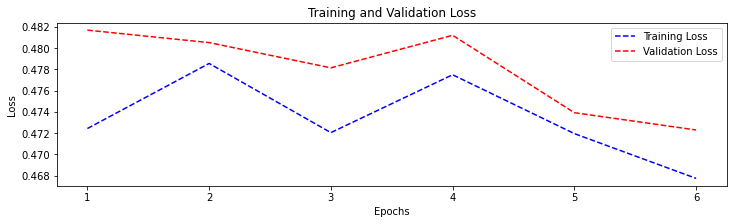

In [19]:
def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,1,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
#         acc = history.history["accuracy"]
#         val_acc = history.history["val_accuracy"]
#         epochs = range(1, len(acc)+1)
#         plt.subplot(1,2,2)
#         plt.plot(epochs, acc, "b-", label="Training Acc")
#         plt.plot(epochs, val_acc, "r--", label="Validation Acc")
#         plt.title("Training and Validation Accuracy")
#         plt.xlabel("Epochs")
#         plt.ylabel("Accuracy")
#         plt.legend()
        plt.show()
        
visual_train_status(history)

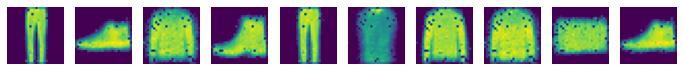

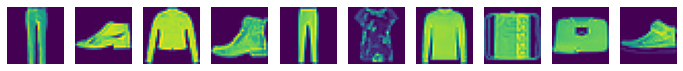

In [48]:
#index = np.random.randint(5000)
predictions = model.predict(x_test[index:index+10])
predictions = tf.reshape(predictions,shape=(-1,28,28))
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.axis("off")
    plt.imshow(predictions[i])
plt.show()
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.axis("off")
    img = tf.reshape(x_test[index+i],shape=(28,28))
    plt.imshow(img)
plt.show()

In [80]:
from PIL import Image
def save_img(imgs,names):
    img_new = Image.new('L',(280,56))
    index = 0
    for i in range(0,280,28):
        for j in range(0,56,28):
            img = imgs[index]
            img = Image.fromarray(img,mode='L')
            img_new.paste(img,(i,j))
            index+=1
    img_new.save(names)

In [82]:

x = x_test[index:index+10]
x = tf.reshape(x,[-1,28,28])
x = tf.cast(x,dtype=np.float32)
x_pred = tf.sigmoid(predictions)
x_pred = tf.reshape(x_pred,[-1,28,28])
x_pred = tf.concat([x,x_pred],axis=0)
x_pred = x_pred.numpy()*255
x_pred = x_pred.astype(np.uint8)

save_img(x_pred,"ae.jpg")
print("ae.jpg saved")

ae.jpg saved


In [89]:
# ![title](ae.jpg)

![title](ae.jpg)